In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from dateutil import parser

In [2]:
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
sns.set()
%matplotlib inline 

In [3]:
import datetime
from datetime import datetime

In [4]:
from dateutil import parser

In [5]:
df = pd.read_csv("C:/Users/user/Downloads/takehome_user_engagement.csv")

In [6]:
users = pd.read_csv("C:/Users/user/Downloads/takehome_users.csv",encoding='latin1')

In [7]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
user_id_counts = df.user_id.value_counts() >= 3
potential_adopted_users = [user_id for user_id in user_id_counts.index if user_id_counts[user_id] == True]

In [9]:
potential_adopted_users

[3623,
 906,
 1811,
 7590,
 8068,
 9402,
 4022,
 3269,
 9312,
 7210,
 8029,
 2474,
 2658,
 8280,
 69,
 5297,
 4019,
 9083,
 2519,
 4263,
 3226,
 10599,
 6312,
 10953,
 2316,
 8426,
 603,
 2078,
 445,
 7536,
 8768,
 11428,
 6171,
 5609,
 7120,
 9281,
 10734,
 8381,
 5939,
 7572,
 5386,
 2622,
 11300,
 1822,
 2771,
 6064,
 4282,
 8912,
 6405,
 5151,
 5682,
 4402,
 5101,
 9728,
 2300,
 1769,
 9450,
 9958,
 4965,
 5240,
 2568,
 8721,
 9434,
 2620,
 4924,
 754,
 5861,
 9691,
 4143,
 6757,
 7511,
 728,
 6204,
 10524,
 8553,
 6282,
 6909,
 7375,
 4186,
 10320,
 9724,
 9325,
 10258,
 11267,
 8297,
 9582,
 10352,
 4489,
 3066,
 605,
 7431,
 4803,
 9286,
 11083,
 9042,
 5965,
 2739,
 11688,
 9601,
 10791,
 1155,
 5415,
 4234,
 9540,
 8310,
 4713,
 10656,
 4181,
 5057,
 2539,
 6978,
 4934,
 4742,
 3411,
 7153,
 6284,
 1202,
 1865,
 4745,
 3957,
 3160,
 3824,
 9771,
 7926,
 1027,
 3175,
 4835,
 63,
 9400,
 8399,
 5507,
 9645,
 783,
 2447,
 10630,
 4837,
 10602,
 4785,
 9694,
 3556,
 4248,
 7107,
 

In [10]:
adopted_users = []
for user in potential_adopted_users:
    user_dates = df[df.user_id == user].time_stamp.tolist()
    user_dates = [parser.parse(date) for date in user_dates]

    queue = user_dates[0:3]
    adopted = False
    cur_index = 2

    while adopted == False:
        if ((queue[-1] - queue[0]).days <= 7):
            adopted = True
        else:
            try:
                cur_index += 1
                queue.pop(0)
                queue.append(user_dates[cur_index])
            except:
                break

    if adopted == True:
        adopted_users.append(user)

In [11]:
len(adopted_users)

1656

In [12]:
def adopted_function(x, adopted_users_list):
    if x in adopted_users_list:
        return True
    else:
        return False

users['adopted'] = users['object_id'].apply(lambda x: adopted_function(x, adopted_users))

In [13]:
users.adopted.value_counts()

False    10344
True      1656
Name: adopted, dtype: int64

In [14]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [15]:
domain= users["email"].str.split("@", n = 1, expand = True)

In [16]:
domain[1]

0          yahoo.com
1          gustr.com
2          gustr.com
3          yahoo.com
4          yahoo.com
            ...     
11995      gustr.com
11996      gmail.com
11997       cuvox.de
11998      iuxiw.com
11999    hotmail.com
Name: 1, Length: 12000, dtype: object

In [17]:
users["email_domain"]=domain[1]

In [18]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com


In [20]:
common_emails = users.email_domain.value_counts() > 5

In [21]:
common_emails = [email for email in common_emails.index if common_emails[email] == True]

In [22]:
common_emails

['gmail.com',
 'yahoo.com',
 'jourrapide.com',
 'cuvox.de',
 'gustr.com',
 'hotmail.com']

In [23]:
def email_function(email):
    if email in common_emails:
        return email
    else:
        return 'other'
        
users['adjusted_email'] = users['email_domain'].apply(lambda x: email_function(x))

In [24]:
users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [25]:
users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [26]:
users["inv_notinv"]=np.where(users['invited_by_user_id'].isnull(), 'not_invited', 'invited')

In [27]:
users["login_or_not"]=np.where(users['last_session_creation_time'].isnull(), 'didnt_login', 'loggedin')

In [28]:
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,email_domain,adjusted_email,inv_notinv,login_or_not
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com,yahoo.com,invited,loggedin
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com,gustr.com,invited,loggedin
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com,gustr.com,invited,loggedin
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com,yahoo.com,invited,loggedin
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com,yahoo.com,invited,loggedin
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False,yahoo.com,yahoo.com,invited,loggedin
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False,jourrapide.com,jourrapide.com,not_invited,loggedin
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,False,yahoo.com,yahoo.com,not_invited,didnt_login
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,False,hotmail.com,hotmail.com,not_invited,didnt_login
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True,gustr.com,gustr.com,invited,loggedin


In [29]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [30]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
email_domain                     0
adjusted_email                   0
inv_notinv                       0
login_or_not                     0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
users['creation_source'] = LabelEncoder().fit_transform(users['creation_source'].astype(str))

In [33]:
users['login_or_not'] = LabelEncoder().fit_transform(users['login_or_not'].astype(str))

In [34]:
users['last_session_creation_time'] = LabelEncoder().fit_transform(users['last_session_creation_time'].astype(str))

In [35]:
users['invited_by_user_id'] = LabelEncoder().fit_transform(users['invited_by_user_id'].astype(str))

In [36]:
users['inv_notinv'] = LabelEncoder().fit_transform(users['inv_notinv'].astype(str))

In [37]:
users['adopted'] = LabelEncoder().fit_transform(users['adopted'].astype(str))

In [38]:
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,email_domain,adjusted_email,inv_notinv,login_or_not
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,6561,1,0,11,177,0,yahoo.com,yahoo.com,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,6211,0,0,1,913,1,gustr.com,gustr.com,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2253,0,0,94,517,0,gustr.com,gustr.com,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2850,0,0,1,1405,0,yahoo.com,yahoo.com,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,1745,0,0,193,1428,0,yahoo.com,yahoo.com,0,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,0,4959,0,0,197,291,0,yahoo.com,yahoo.com,0,1
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,3,1496,0,1,37,2564,0,jourrapide.com,jourrapide.com,1,1
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,2,8821,1,1,74,2564,0,yahoo.com,yahoo.com,1,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,2,8821,0,0,302,2564,0,hotmail.com,hotmail.com,1,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,8432,1,1,318,1167,1,gustr.com,gustr.com,0,1


In [39]:
users.corr()

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,inv_notinv,login_or_not
object_id,1.000000,0.014072,0.002087,-0.032370,-0.022040,0.004110,0.016671,0.005292,0.009149,0.009295
creation_source,0.014072,1.000000,-0.112204,-0.004563,0.001282,0.012143,0.660906,-0.003465,0.866293,0.154779
last_session_creation_time,0.002087,-0.112204,1.000000,-0.002093,-0.004960,0.026513,0.014293,0.192843,0.009516,-0.665215
opted_in_to_mailing_list,-0.032370,-0.004563,-0.002093,1.000000,0.483529,0.003432,0.007728,0.008838,-0.006934,0.010764
enabled_for_marketing_drip,-0.022040,0.001282,-0.004960,0.483529,1.000000,0.009275,0.003025,0.006578,-0.002216,0.012418
org_id,0.004110,0.012143,0.026513,0.003432,0.009275,1.000000,0.001599,0.066995,0.018442,0.009238
invited_by_user_id,0.016671,0.660906,0.014293,0.007728,0.003025,0.001599,1.000000,-0.014409,0.762024,-0.019715
adopted,0.005292,-0.003465,0.192843,0.008838,0.006578,0.066995,-0.014409,1.000000,-0.027831,0.240097
inv_notinv,0.009149,0.866293,0.009516,-0.006934,-0.002216,0.018442,0.762024,-0.027831,1.000000,-0.021925
login_or_not,0.009295,0.154779,-0.665215,0.010764,0.012418,0.009238,-0.019715,0.240097,-0.021925,1.000000


In [40]:
rc={'figure.figsize':(12,10)}
sns.set(rc)

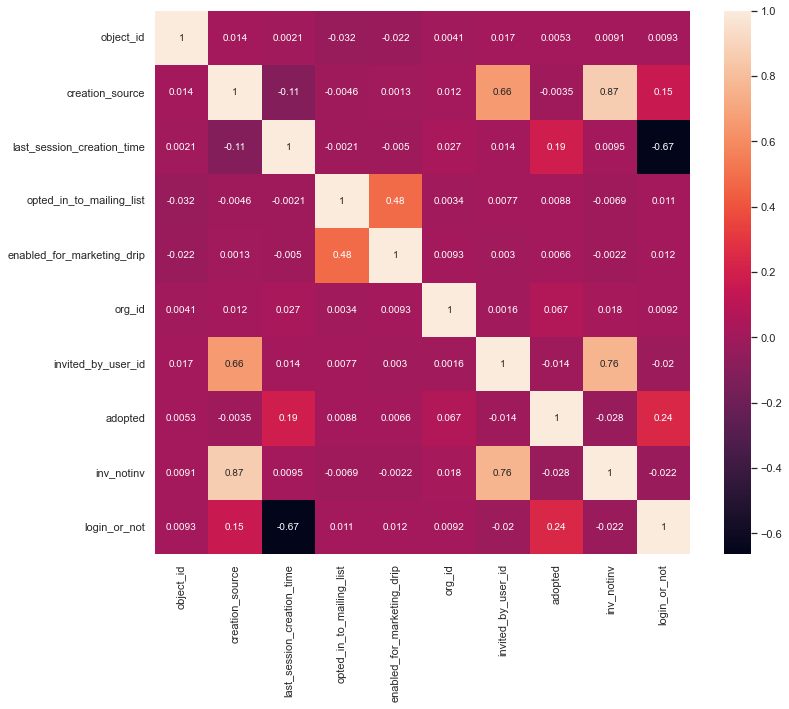

In [41]:
sns.heatmap(users.corr(),annot=True)
plt.show()

#correlation
-1 means perfect negative linear correlation
+1 means perfect positive linear correlation
0 means no linear dependency between variables.

In [42]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted',
       'email_domain', 'adjusted_email', 'inv_notinv', 'login_or_not'],
      dtype='object')

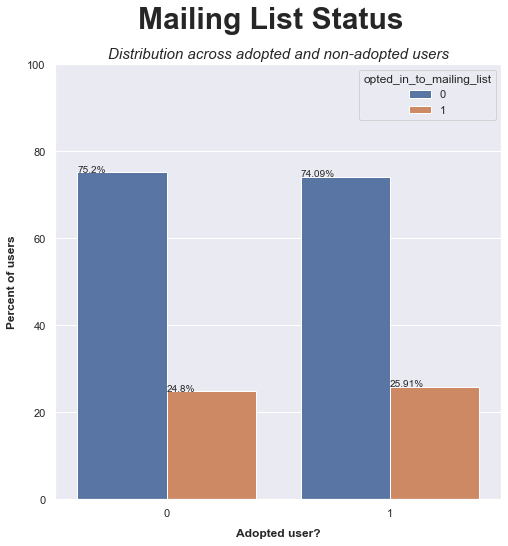

In [43]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'opted_in_to_mailing_list'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Mailing List Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

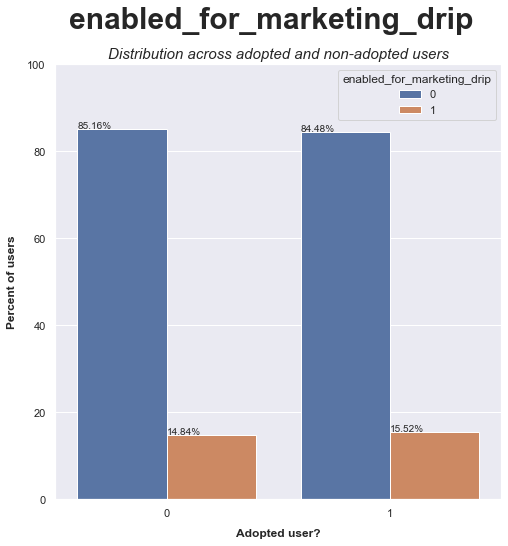

In [44]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'enabled_for_marketing_drip'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('enabled_for_marketing_drip', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

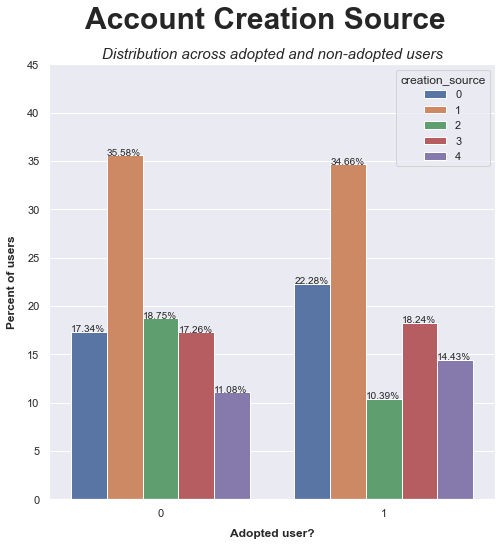

In [45]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'creation_source'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,45)
plt.suptitle('Account Creation Source', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

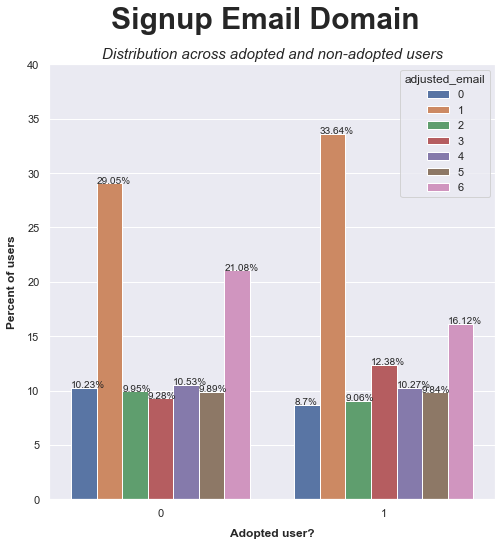

In [74]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'adjusted_email'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,40)
plt.suptitle('Signup Email Domain', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

In [46]:
users['creation_source'].value_counts()

1    4254
0    2163
2    2111
3    2087
4    1385
Name: creation_source, dtype: int64

In [47]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted',
       'email_domain', 'adjusted_email', 'inv_notinv', 'login_or_not'],
      dtype='object')

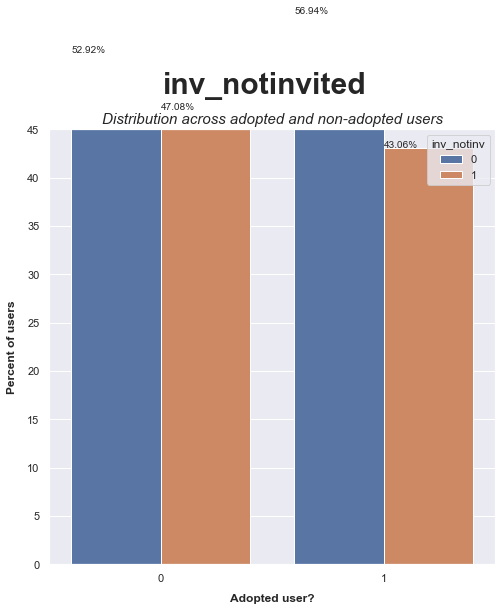

In [75]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'inv_notinv'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,45)
plt.suptitle('inv_notinvited', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

# Test-train split

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [52]:
users['adjusted_email'] = LabelEncoder().fit_transform(users['adjusted_email'].astype(str))

In [53]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,email_domain,adjusted_email,inv_notinv,login_or_not
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,6561,1,0,11,177,0,yahoo.com,6,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,6211,0,0,1,913,1,gustr.com,2,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2253,0,0,94,517,0,gustr.com,2,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2850,0,0,1,1405,0,yahoo.com,6,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,1745,0,0,193,1428,0,yahoo.com,6,0,1


In [54]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted',
       'email_domain', 'adjusted_email', 'inv_notinv', 'login_or_not'],
      dtype='object')

In [66]:
X = users.drop(['object_id','creation_time','email','name','email_domain','adopted'],axis = 1)
y = users['adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [67]:
X.dtypes

creation_source               int32
last_session_creation_time    int32
opted_in_to_mailing_list      int64
enabled_for_marketing_drip    int64
org_id                        int64
invited_by_user_id            int32
adjusted_email                int32
inv_notinv                    int32
login_or_not                  int32
dtype: object

In [68]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(multi_class='multinomial',max_iter=2000)

In [69]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [70]:
log_model_preds = log_model.predict(X_test)

print("LogisticRegression accuracy:",metrics.accuracy_score(y_test, log_model_preds))

LogisticRegression accuracy: 0.8996666666666666


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
def plot_confusion_matrix(conf_mat, labels, model_name):
    fig,ax1 = plt.subplots(figsize=(4, 4))

    sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='d', cbar=False, square=True)

    # set + rotate labels
    ax1.set_yticklabels(labels, rotation=0, fontsize="10", va="center")
    ax1.set_xticklabels(labels, rotation=90, fontsize="10", va="top")

    # set titles
    plt.suptitle('Confusion Matrix', fontsize=18, y=1, fontweight='bold')
    plt.title(model_name, fontsize=10, style='italic')
    ax1.set_ylabel('Actual', labelpad=10, fontsize=12, fontweight='bold')
    ax1.set_xlabel('Predicted', labelpad=10,fontsize=12, fontweight='bold')

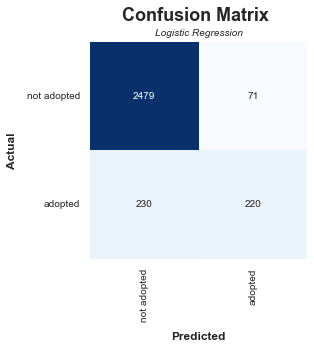

In [73]:
conf_mat = confusion_matrix(y_test, log_model_preds)
plot_confusion_matrix(conf_mat, ['not adopted', 'adopted'], 'Logistic Regression')